In [1]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import imblearn as im

In [2]:
#read the data file into a dataframe
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df.head(4)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False


In [4]:
#check for null values
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

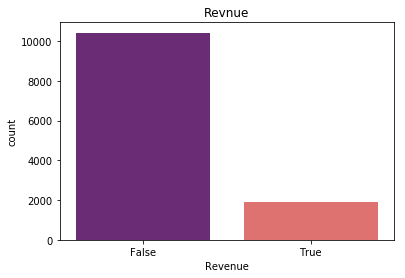

In [5]:
#check data balance
sns.countplot(x='Revenue',data=df,palette='magma')
plt.title('Revnue')
plt.show()

In [6]:
#Feature Engineering

#convert nominal variables with more than 2 categories to dummies
df = pd.get_dummies(df,columns=['Month','VisitorType'],drop_first=True)

#convert nominal variables with 2 categories
df['Weekend']= df['Weekend'].apply(lambda x : 0 if str(x)=='False' else 1) #dtype of weekend & reveune is int so convert to string
df['Revenue']= df['Revenue'].apply(lambda x : 0 if str(x)=='False' else 1)

In [8]:
#split dataframe into independent and dependent features
X= df.drop(columns=['Revenue'])
Y= df['Revenue'].values

In [9]:
#split the data into test and train 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

In [10]:
#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [11]:
#check if the data is linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)
from sklearn.metrics import r2_score
print(r2_score(model.predict(X), Y))

-1.47046546338271


In [12]:
# The above score shows data is not linear

In [16]:
#Since the data is highly imbalanced use SMOTE to synthethetically generate minority class data from the training set only to avoid
#bleeding of information into the test set. This is to ensure our model generalizes well to unseen data.

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27)
x_train, y_train = sm.fit_resample(x_train, y_train)


In [30]:
#create SVM 
from sklearn.svm import SVC
model = SVC(kernel='rbf',random_state=0)
model.fit(x_train,y_train)

#predict on test set
y_pred=model.predict(x_test)

In [34]:
#check model performance 
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score,recall_score

# Calculate roc auc. 
roc_value = roc_auc_score(y_test, y_pred)

#calculate accuracy score
acc = accuracy_score(y_test, y_pred)

#calculate f1_score
f1 = f1_score(y_test, y_pred)

#calculate recall score

recall = recall_score(y_test, y_pred)


In [35]:
print( 'roc_score: ' +str(roc_value)+ ' ','accuracy_score: ' + str(acc) + ' ', 'f1_score: '+ str(f1) + ' ', 'recall_score: ' + str(recall)  )

roc_score: 0.793187319724358  accuracy_score: 0.8519870235198702  f1_score: 0.6193952033368092  recall_score: 0.7037914691943128
